# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [49]:
demo_tratado = pd.read_csv('demo_tratado.csv')
demo_tratado.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special
0,0,1,1,1,0,58.832877,3.106849,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,1,0,52.356164,8.358904,1,0,1,...,0,1,0,0,0,0,0,0,0,1
2,2,1,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,0,1,0,0,0
3,3,0,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,4,0,0,1,0,27.482192,4.024658,1,0,1,...,0,1,0,0,0,0,0,0,0,1


In [50]:
y = demo_tratado.mau
X = demo_tratado.drop('mau',axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

1. Definindo o objeto com a função da árvore de decisão

In [52]:
clf = DecisionTreeClassifier(random_state=100)

2. Treinando o modelo para os dados de treinamento

In [53]:
clf = clf.fit(X_train,y_train)

3. Visualizando a árvore

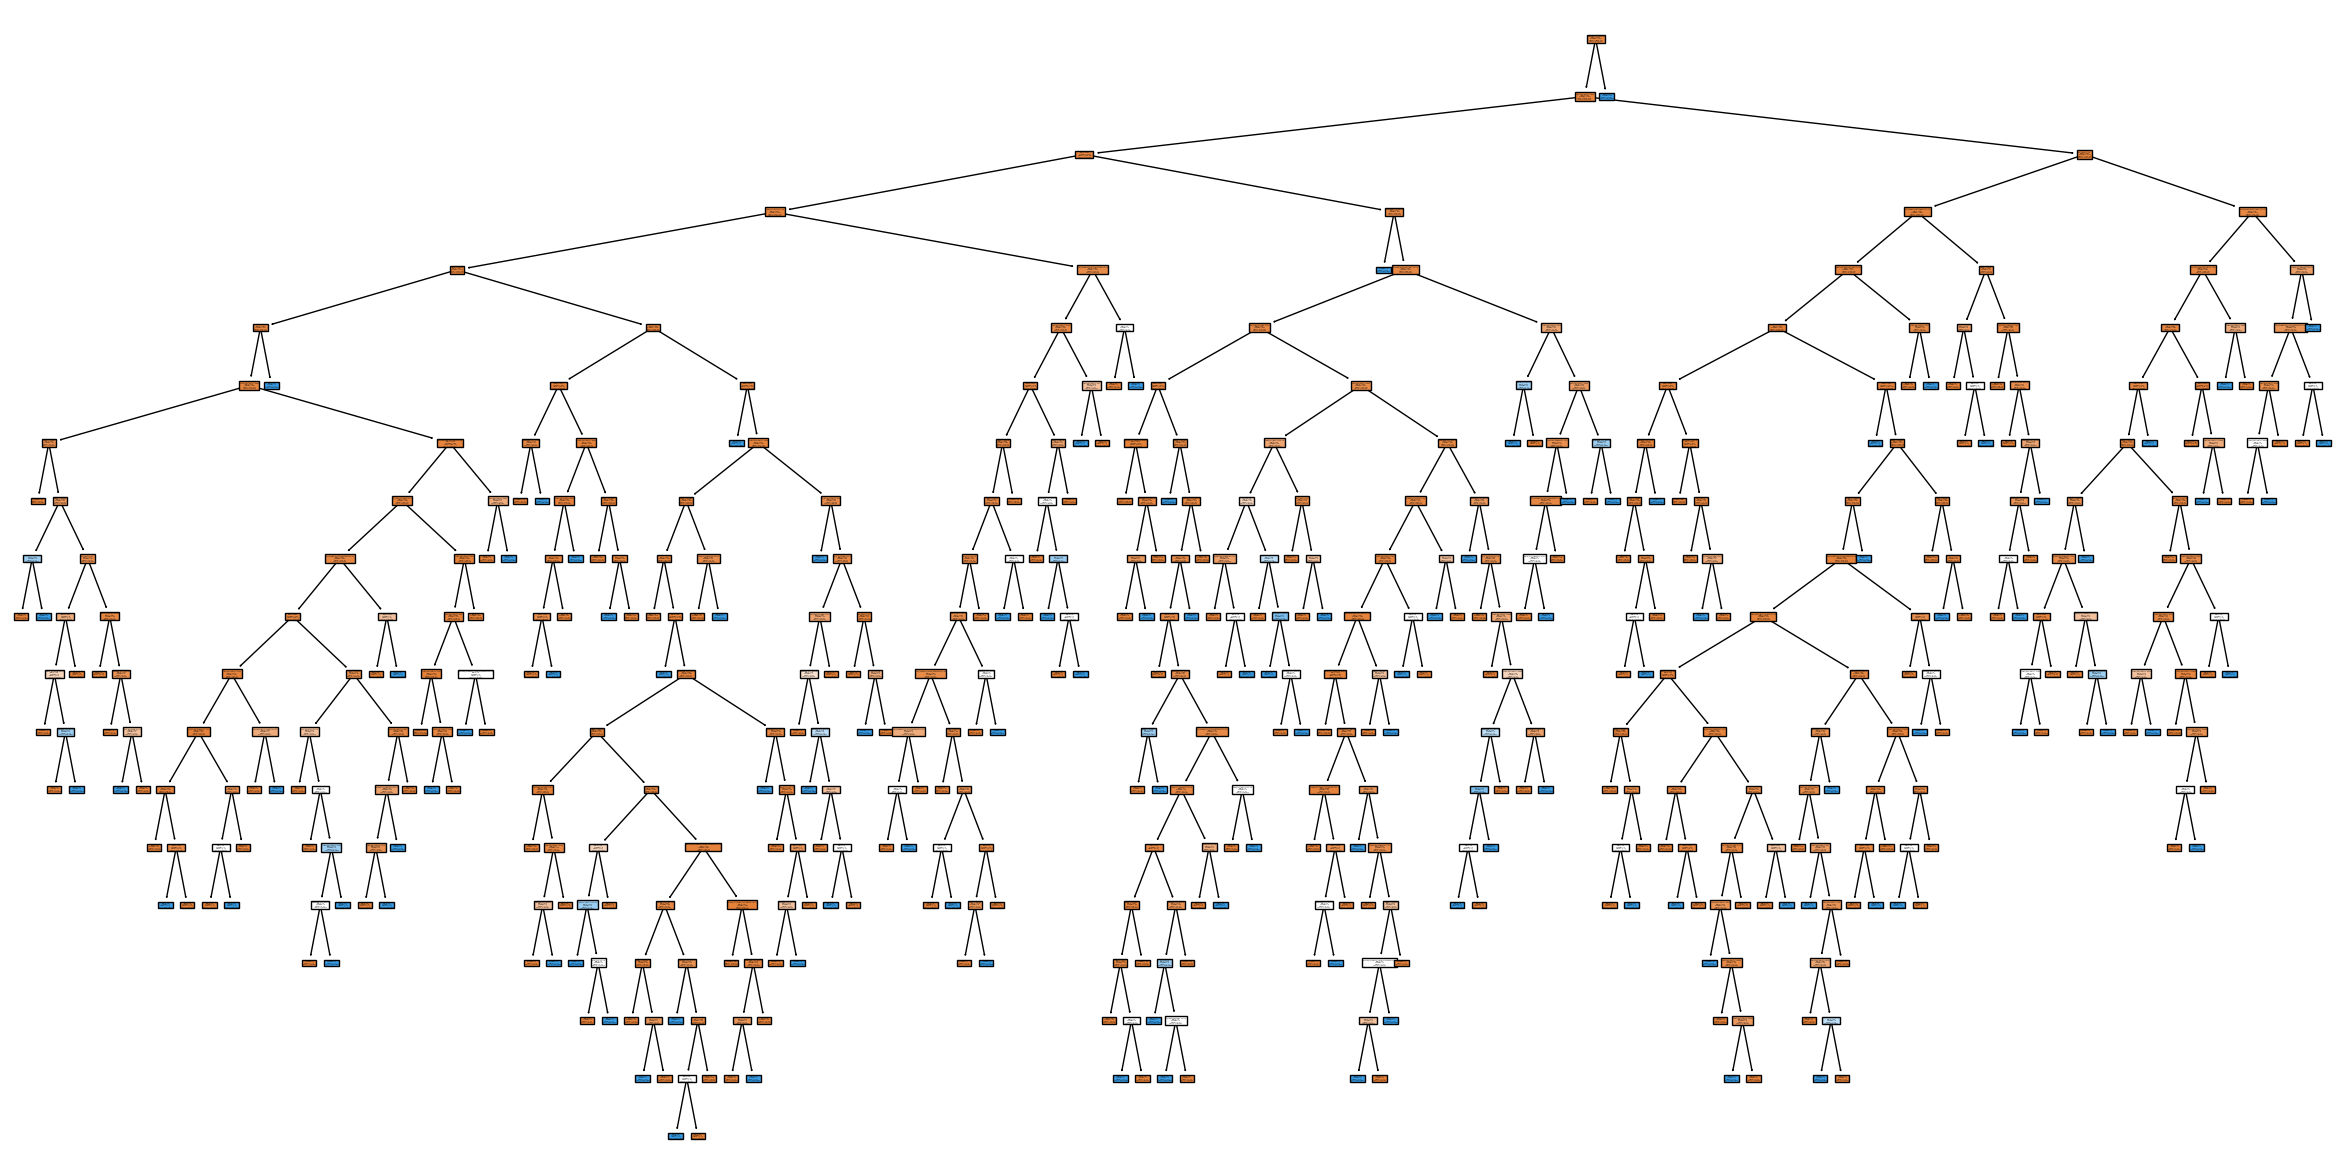

In [54]:
plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, class_names=['aprovados', 'reprovados'], feature_names=list(X_train.columns));

4. Matriz de classificação

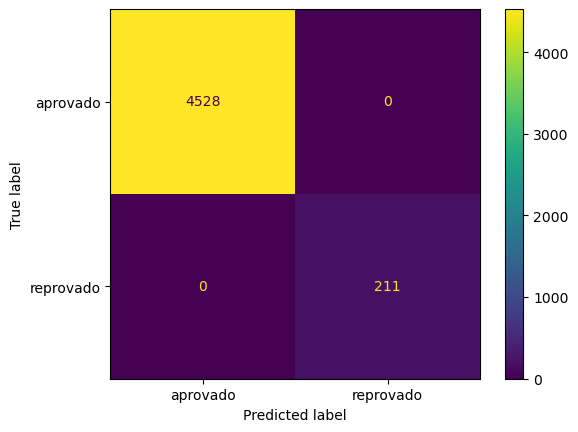

In [55]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovado', 'reprovado'])

MatrizDeConfusao.plot()

In [57]:
y_chapeu_treino = clf.predict(X_train)
accuracy_score (y_train, y_chapeu_treino)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

1. Classificando a base teste

In [58]:
y_chapeu_teste = clf.predict(X_test)

2. Matriz de confusão para a base teste

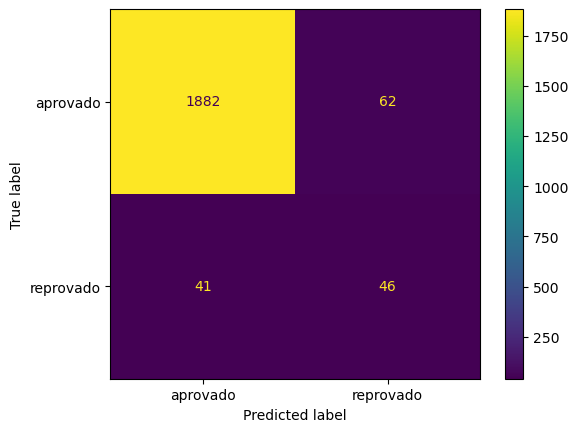

In [59]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovado', 'reprovado'])

MatrizDeConfusao.plot()

3. Acurácia da base teste

In [60]:
accuracy_score (y_test, y_chapeu_teste)

0.9492860659773511

4. Árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10

In [61]:
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5 ,random_state=123)
clf = clf.fit(X_train,y_train)

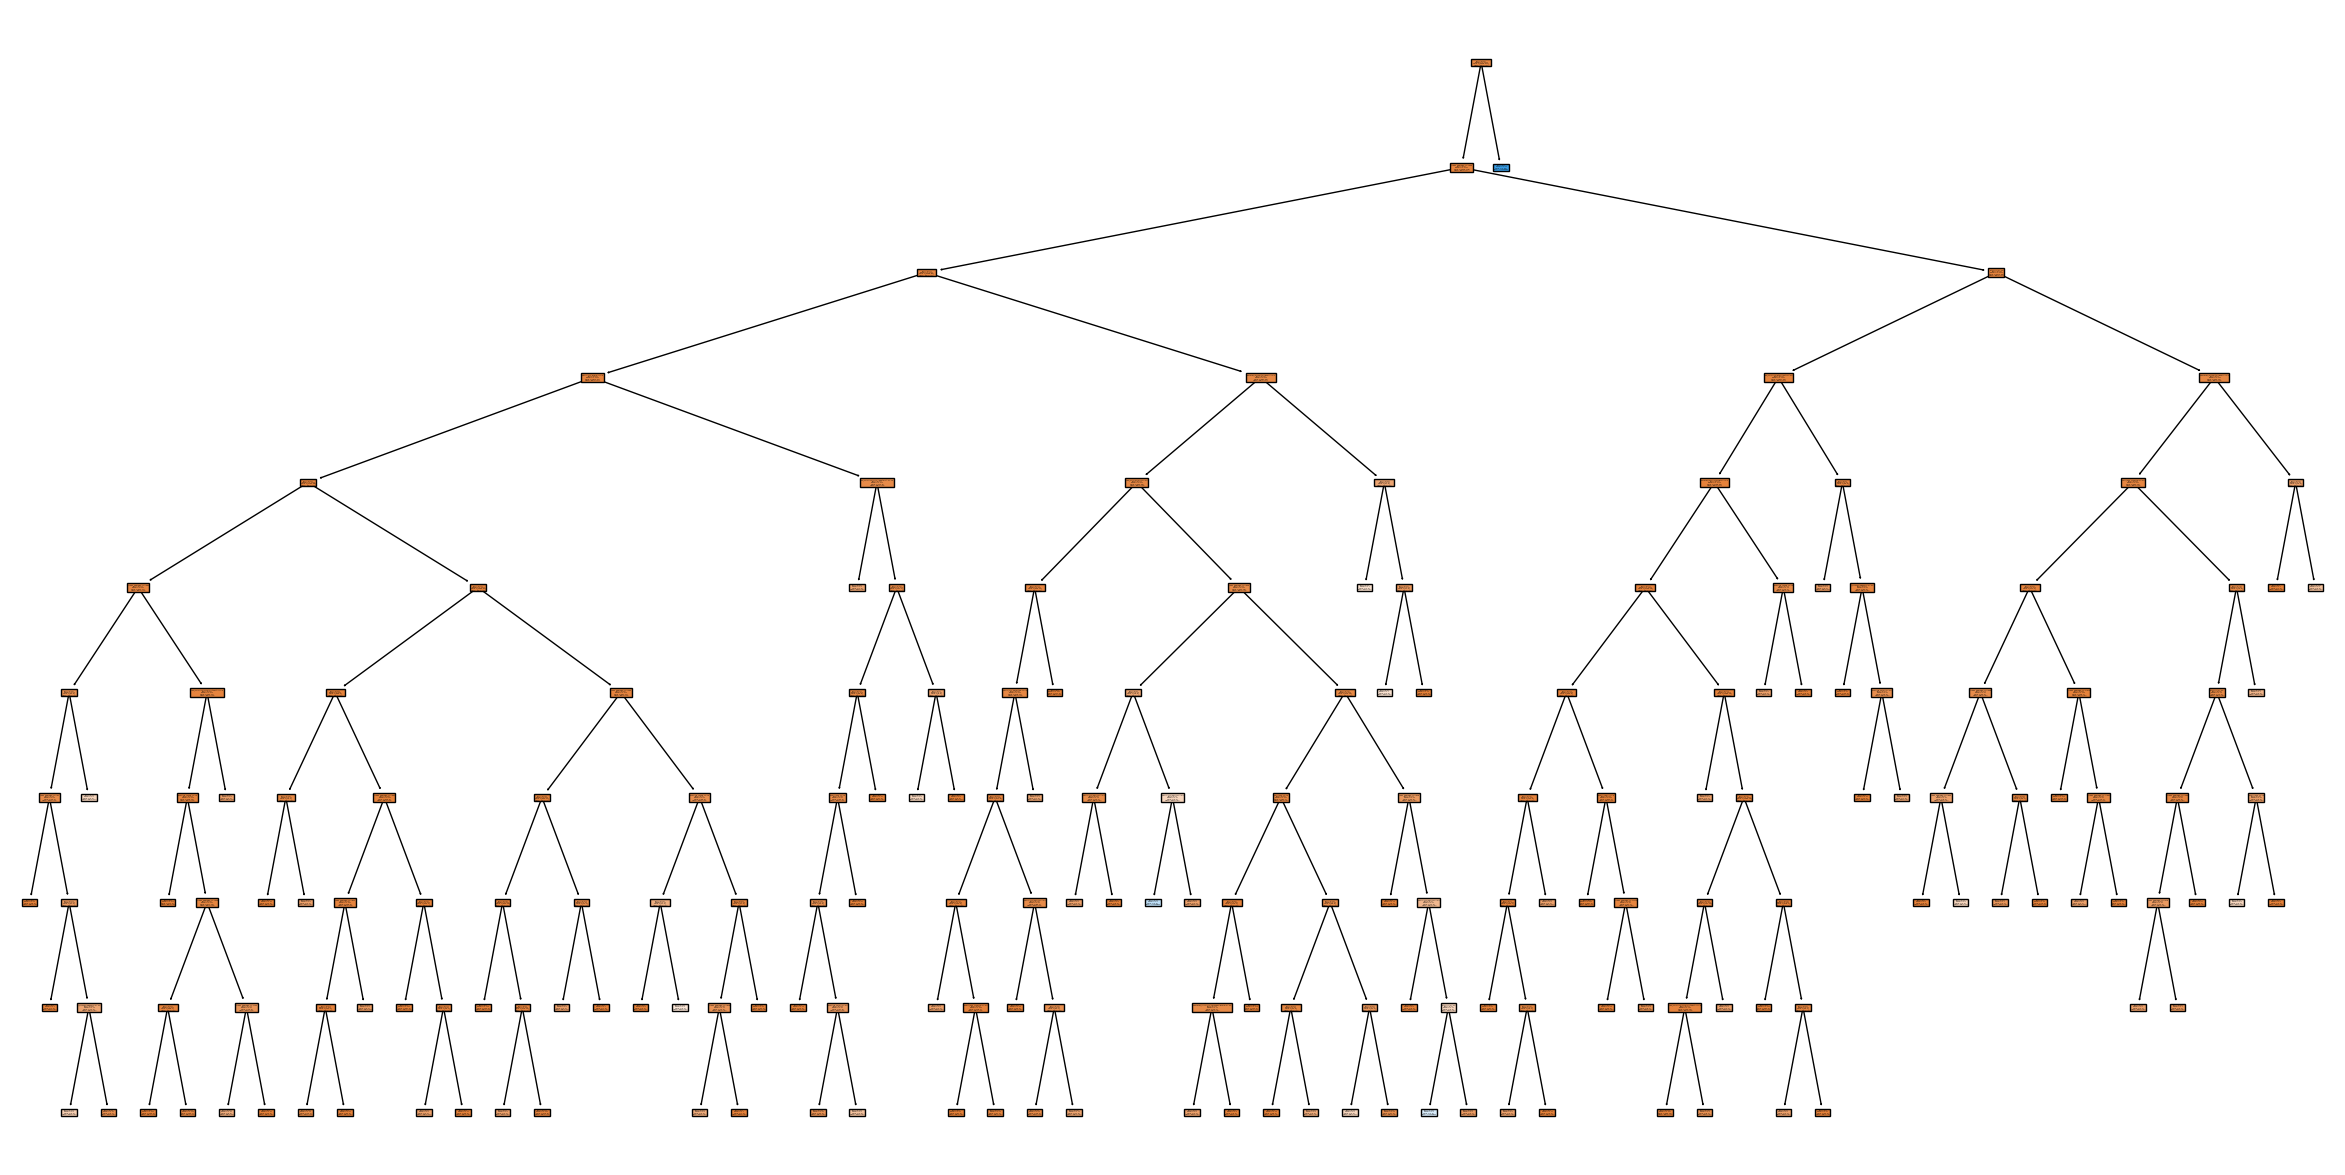

In [62]:
plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, class_names=['aprovados', 'reprovados'], feature_names=list(X_train.columns));

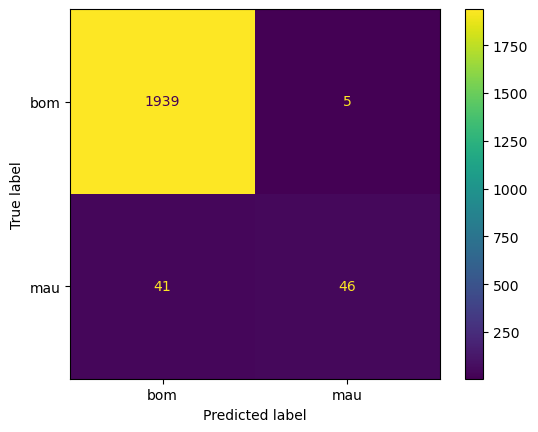

In [65]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bom', 'mau'])

MatrizDeConfusao.plot()

Proporção maus preditos

In [66]:
proporção_maus_predict = (46+5)/(41+46+5)
proporção_maus_predict

0.5543478260869565

5. Acurácia se você classificasse todos os contratos como 'bons'

In [67]:
1939 + 41

1980

In [68]:
46+5

51

In [69]:
1980/(1980+51)

0.9748892171344166